In [47]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [48]:
base_hs = pd.read_csv('C:/Users/MyDELL/Desktop/msds/repositorio/household_energy/datasets/Energy_consumption_dataset.csv')

In [49]:
base_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


In [50]:
pd.DataFrame(base_hs.isna().sum().reset_index(name='Na'))

,index,Na
0,Month,0
1,Hour,0
2,DayOfWeek,0
3,Holiday,0
4,Temperature,0
5,Humidity,0
6,SquareFootage,0
7,Occupancy,0
8,HVACUsage,0
9,LightingUsage,0


In [51]:
base_hs.duplicated().sum()

0

In [52]:
base_hs.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


In [53]:
num_cols = base_hs.select_dtypes(include = ['int64', 'float64']).columns
cat_cols = base_hs.select_dtypes(exclude = ['int64', 'float64']).columns

In [54]:
num_cols

Index(['Month', 'Hour', 'Temperature', 'Humidity', 'SquareFootage',
       'Occupancy', 'RenewableEnergy', 'EnergyConsumption'],
      dtype='object')

In [55]:
cat_cols

Index(['DayOfWeek', 'Holiday', 'HVACUsage', 'LightingUsage'], dtype='object')

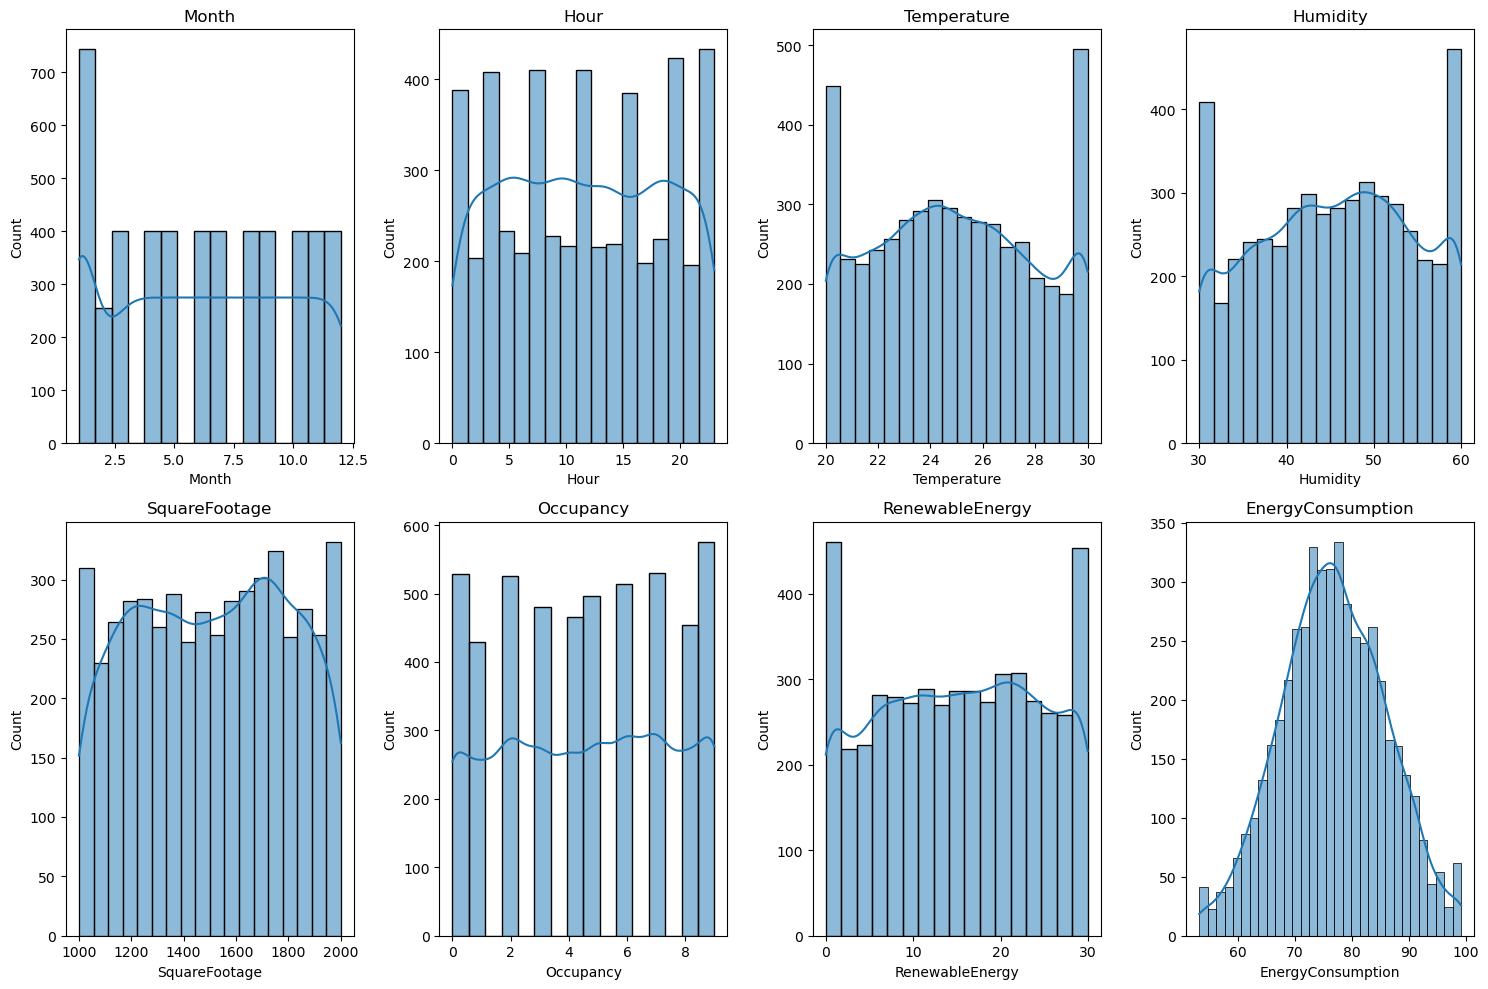

In [56]:
f, ax = plt.subplots(2,4, figsize=(15,10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data = base_hs, x= cols, ax = ax[index],kde=True)
    ax[index].set_title(cols)

plt.tight_layout()
plt.show() 

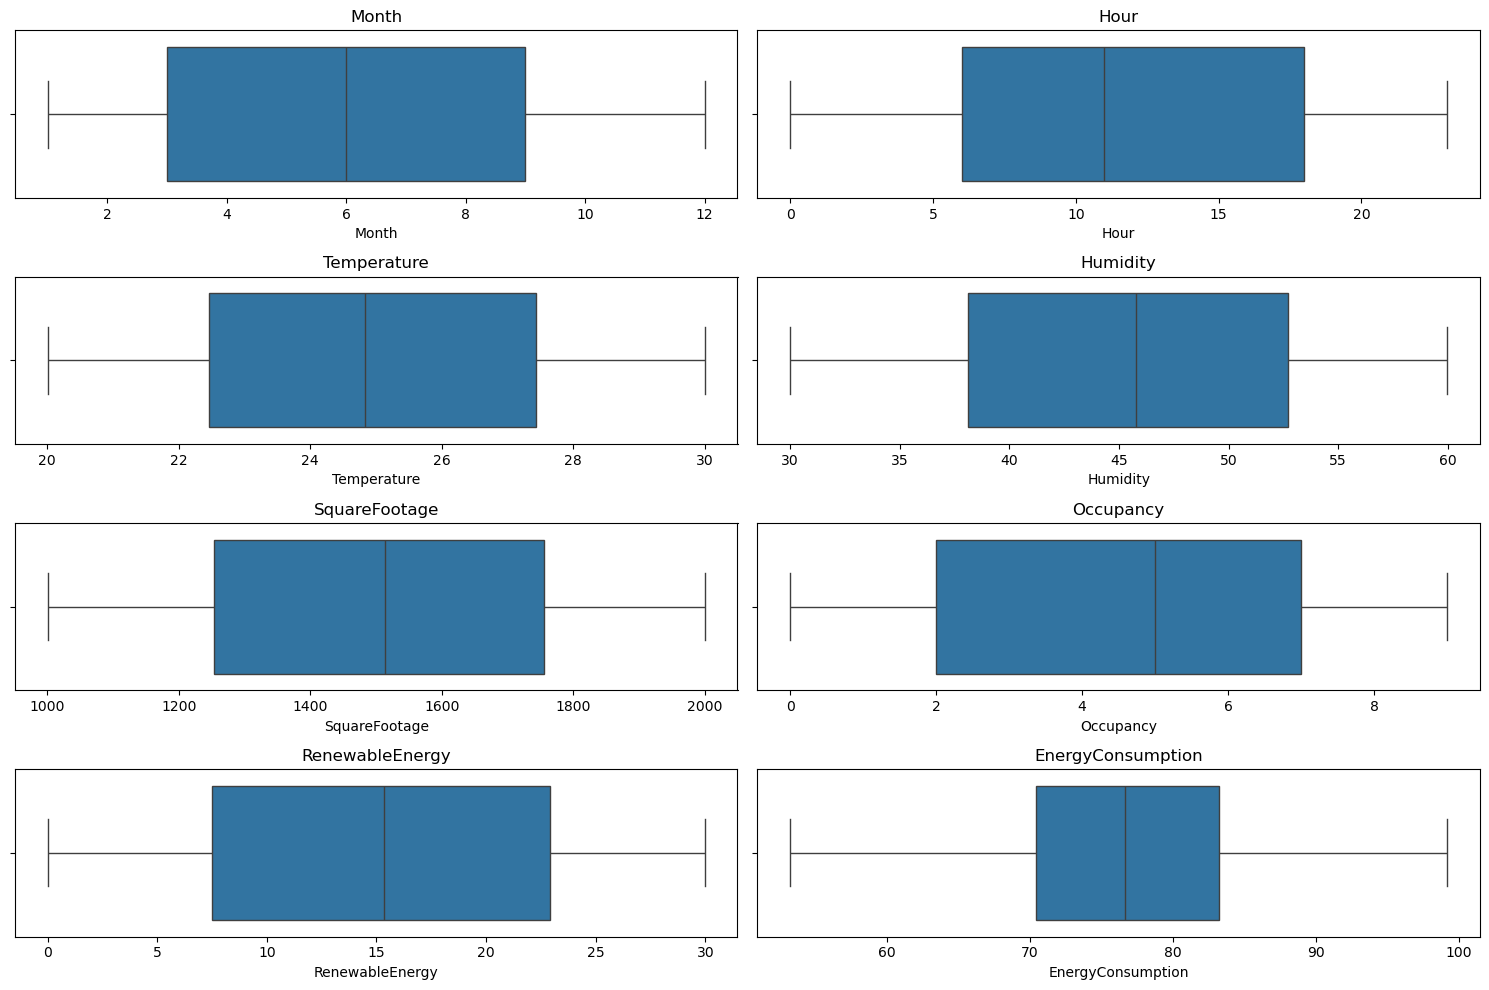

In [57]:
f, ax = plt.subplots(4,2 , figsize=(15,10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(base_hs, x= cols , ax= ax[index])
    ax[index].set_title(cols)

plt.tight_layout()
plt.show()

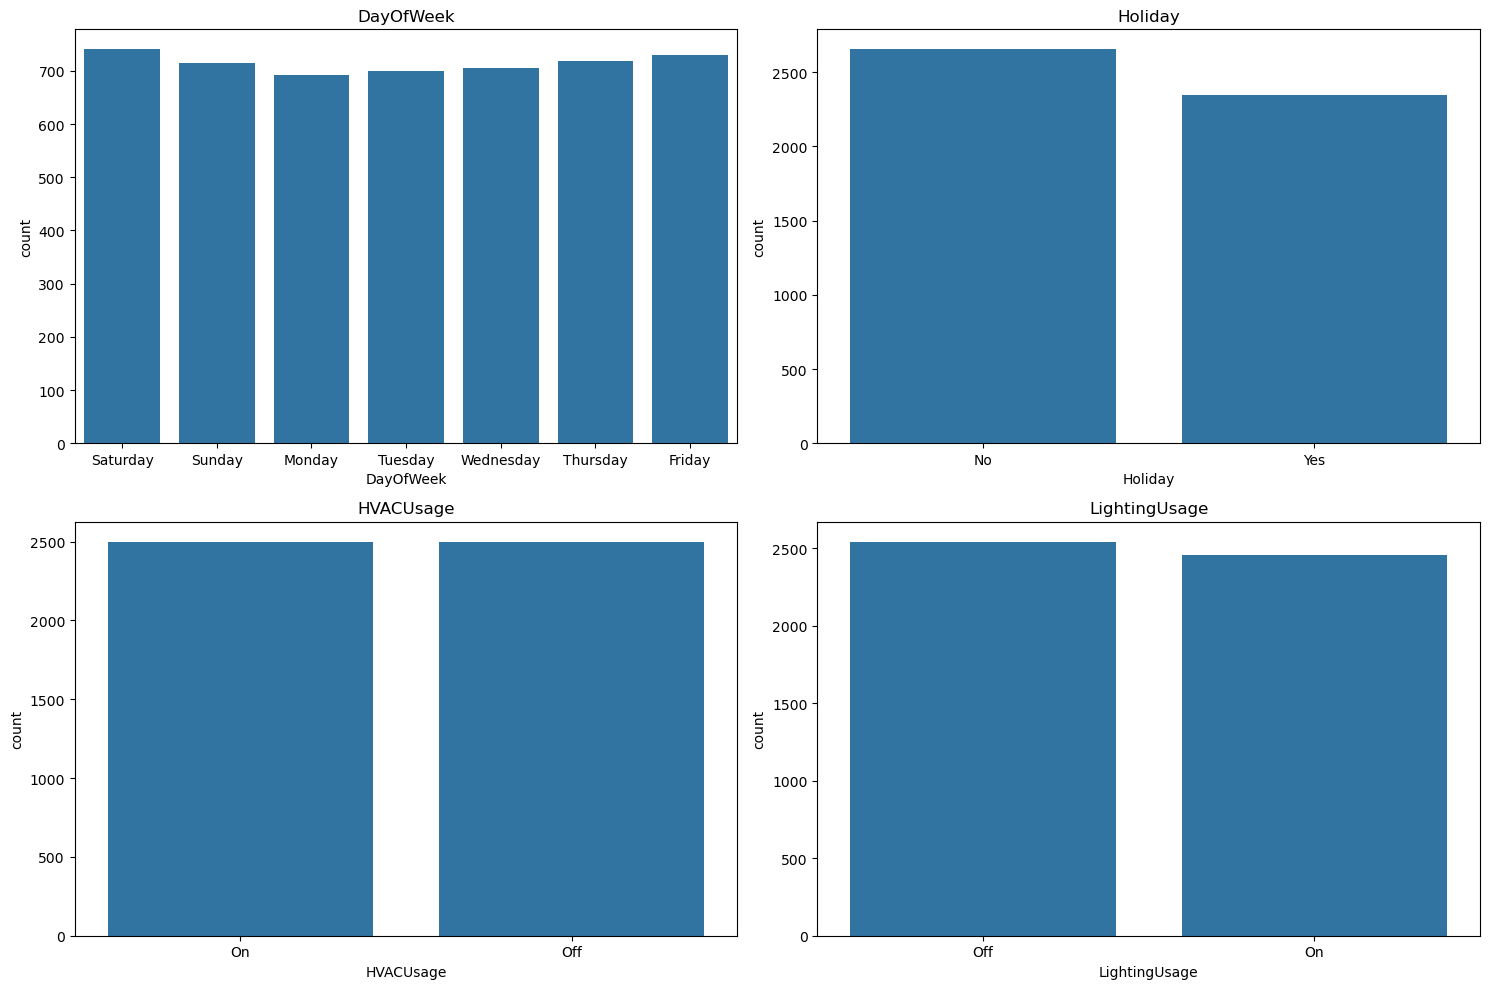

In [58]:
f, ax = plt.subplots(2,2 , figsize=(15,10))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(base_hs, x= cols , ax= ax[index])
    ax[index].set_title(cols)

plt.tight_layout()
plt.show()

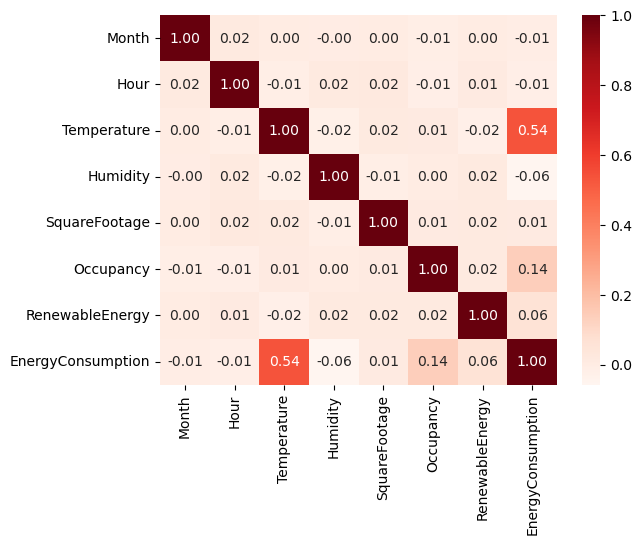

In [59]:
sns.heatmap(base_hs[num_cols].corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.show()

In [60]:
mas = base_hs.groupby(['Month'])['EnergyConsumption'].mean().reset_index(name = 'Average EC')

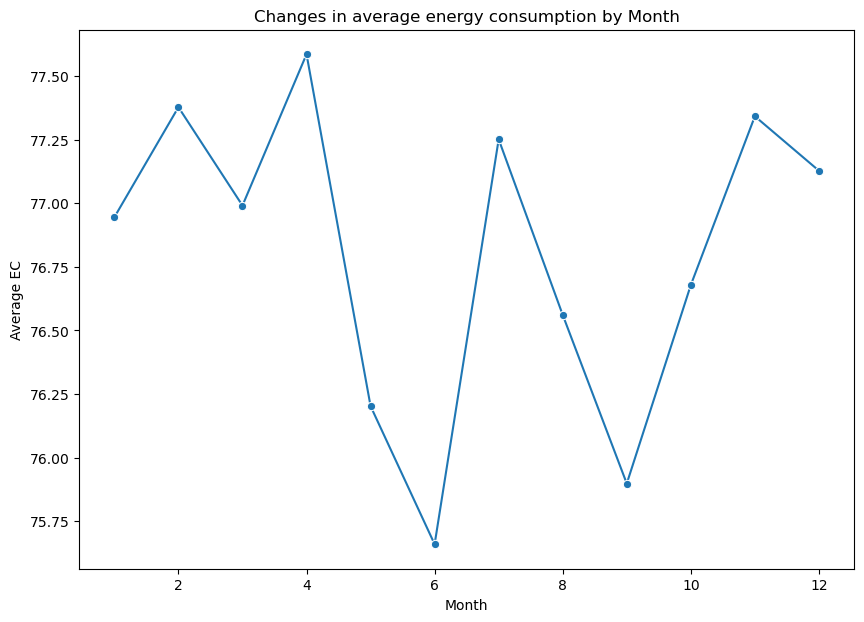

In [61]:
plt.figure(figsize=(10,7))
sns.lineplot(mas, x = 'Month', y= 'Average EC', marker = 'o')
plt.title('Changes in average energy consumption by Month')
plt.show()

In [62]:
mhs = base_hs.groupby(['Hour'])['EnergyConsumption'].mean().reset_index(name = 'Average EC')

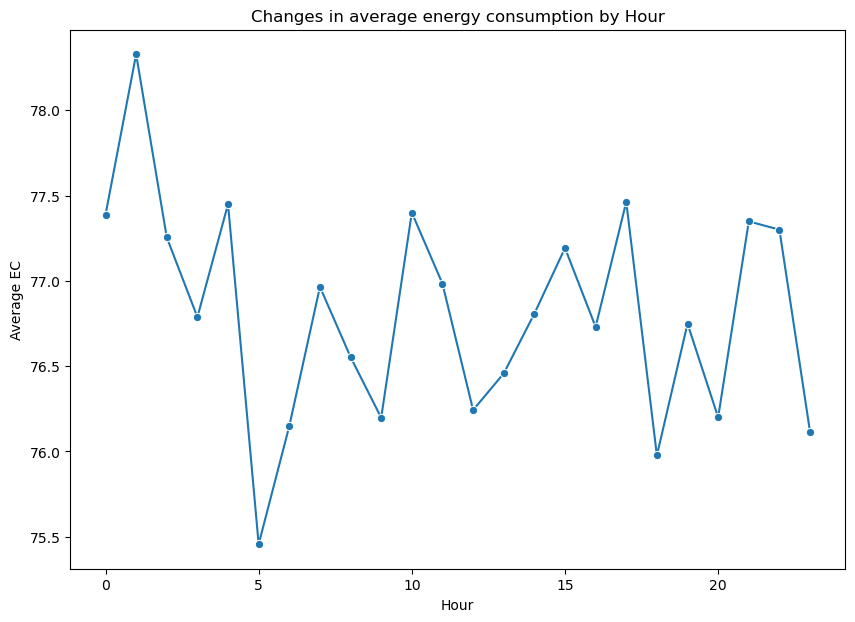

In [63]:
plt.figure(figsize=(10,7))
sns.lineplot(mhs, x = 'Hour', y= 'Average EC', marker = 'o')

plt.title('Changes in average energy consumption by Hour')
plt.show()

In [64]:
#average energy consumption

In [65]:
dowec = base_hs.groupby(['DayOfWeek'])['EnergyConsumption'].mean().reset_index(name = 'Average EC')

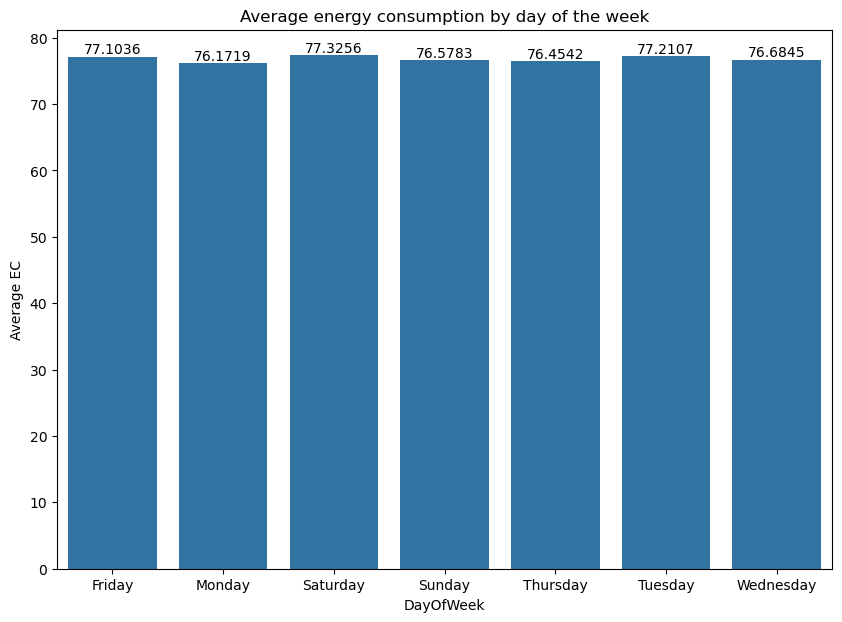

In [66]:
plt.figure(figsize=(10,7))

ax = sns.barplot(data = dowec, x = 'DayOfWeek', y = 'Average EC')
ax.bar_label(ax.containers[0], fontsize=10)

plt.title('Average energy consumption by day of the week')
plt.show()

# modelling

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder , OneHotEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error

In [68]:
Scaler = StandardScaler()
num_cols = base_hs.select_dtypes(include = ['int64', 'float64']).drop(columns=['EnergyConsumption']).columns

for col in num_cols:
    base_hs[[col]] = Scaler.fit_transform(base_hs[[col]])

In [69]:
#label encoder

In [70]:
label_encoder = LabelEncoder()
for col in cat_cols:
    base_hs[col] = label_encoder.fit_transform(base_hs[col])

In [71]:
base_hs.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,-1.463411,-1.677794,2,0,0.063330,-0.228111,0.198865,0.145910,1,0,-1.357179,75.364373
1,-1.463411,-1.532606,2,0,0.915648,0.975031,-0.328667,-1.230602,1,1,0.724126,83.401855
2,-1.463411,-1.387418,2,0,1.235446,1.496859,0.847140,-0.886474,0,0,-0.921408,78.270888
3,-1.463411,-1.242229,2,0,-1.600051,0.545431,-0.187934,-1.230602,0,1,-0.718399,56.519850
4,-1.463411,-1.097041,2,0,-0.608102,0.660211,-1.409920,1.522423,1,0,-1.324712,70.811732


# time test split

In [72]:
x = base_hs.drop(['EnergyConsumption'], axis=1)
y = base_hs['EnergyConsumption']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [74]:
# machine learning

In [75]:
rfc = RandomForestRegressor()
gbc = GradientBoostingRegressor()
lnr = LinearRegression()
rid = Ridge(alpha=1.0)
las = Lasso(alpha=1.0)
xgb = XGBRegressor()

models = [rfc, gbc, lnr, rid, las, xgb]

names = ["Random Forest", "Gradient Boosting", 
         "Linear Regression","Ridge","Lasso", "XGBoost"]

In [76]:
index = 0
mse_ = []
r2_ = []
mae_ = []
rmse_ = []

for name, model in enumerate(models):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(f'{names[index]}')
    
    mse = mean_squared_error(pred, y_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(pred, y_test)
    r2 = r2_score(pred, y_test)
    
    mse_.append(mse)
    mae_.append(mae)
    r2_.append(r2)
    rmse_.append(rmse)
    
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("MAE: ", mae)
    print("r2: ", r2)
    print("-"*50)
    
    index += 1

Random Forest
MSE:  64.81600562605328
RMSE:  8.050838815058546
MAE:  6.3668770664472225
r2:  -1.0075525879828344
--------------------------------------------------
Gradient Boosting
MSE:  61.12575770706215
RMSE:  7.818296343006074
MAE:  6.160737803391194
r2:  -1.10281163865048
--------------------------------------------------
Linear Regression
MSE:  61.09271197618321
RMSE:  7.816182698490563
MAE:  6.166599727337232
r2:  -1.1779078598755595
--------------------------------------------------
Ridge
MSE:  61.090748752916504
RMSE:  7.8160571103924585
MAE:  6.166531746050194
r2:  -1.1789953672446005
--------------------------------------------------
Lasso
MSE:  61.73647186236151
RMSE:  7.857256000816157
MAE:  6.191844387279453
r2:  -2.8851695873636674
--------------------------------------------------
XGBoost
MSE:  73.40845504309354
RMSE:  8.567873425949612
MAE:  6.716427088636195
r2:  -0.7096126552062452
--------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB
None
                index  Na
0               Month   0
1                Hour   0
2           DayOfWeek   0
3             Holiday   0
4         Temperature 

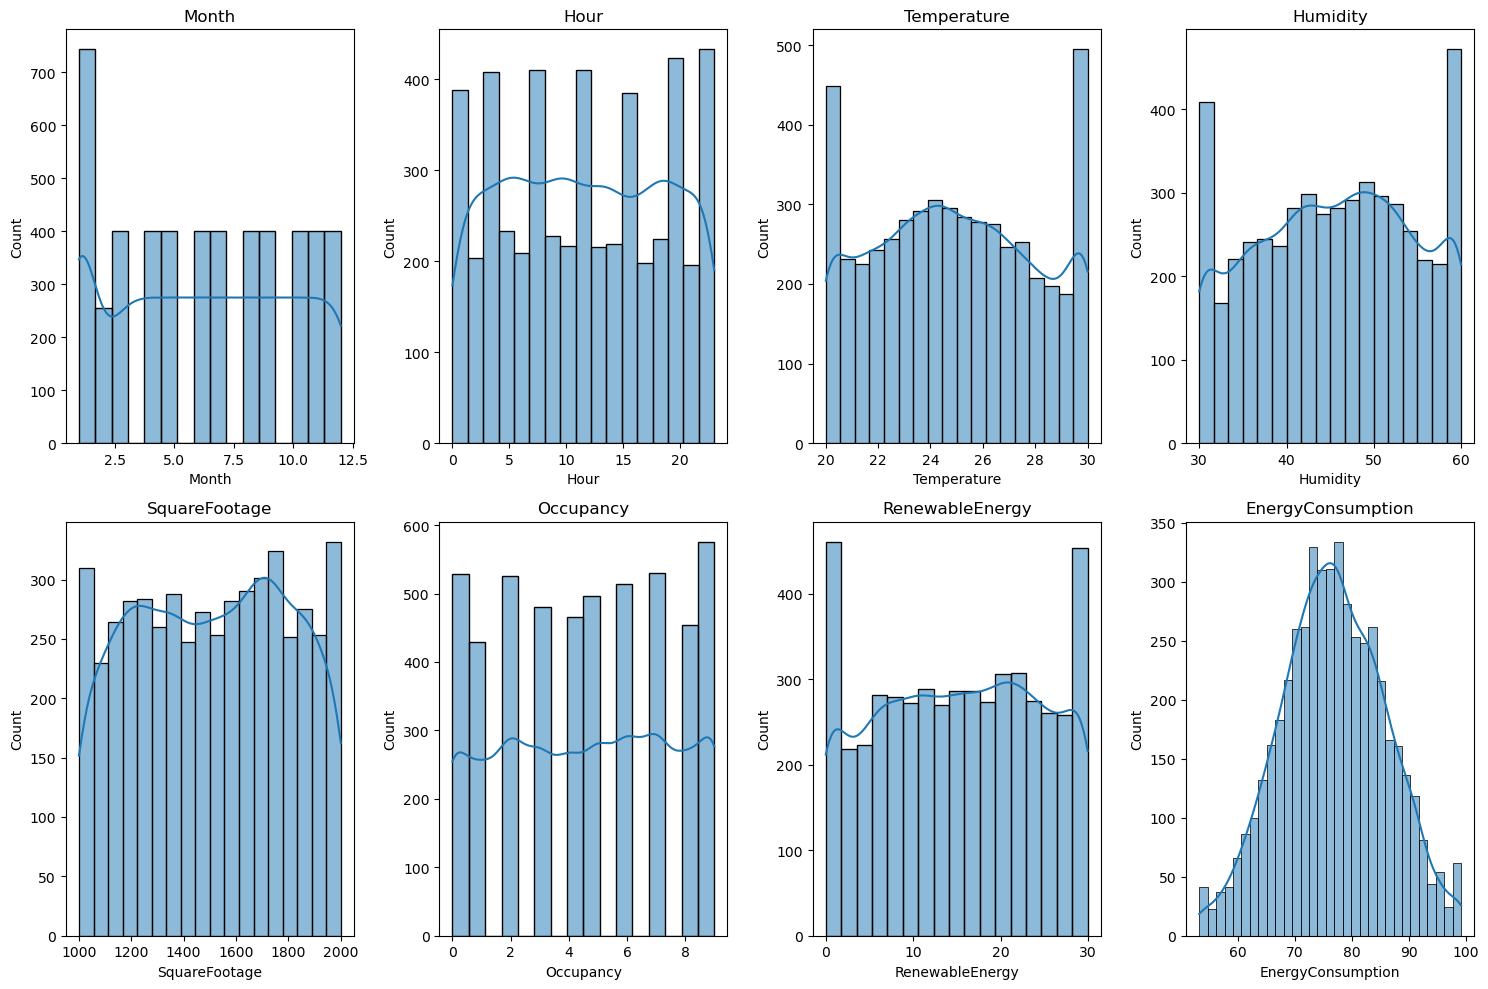

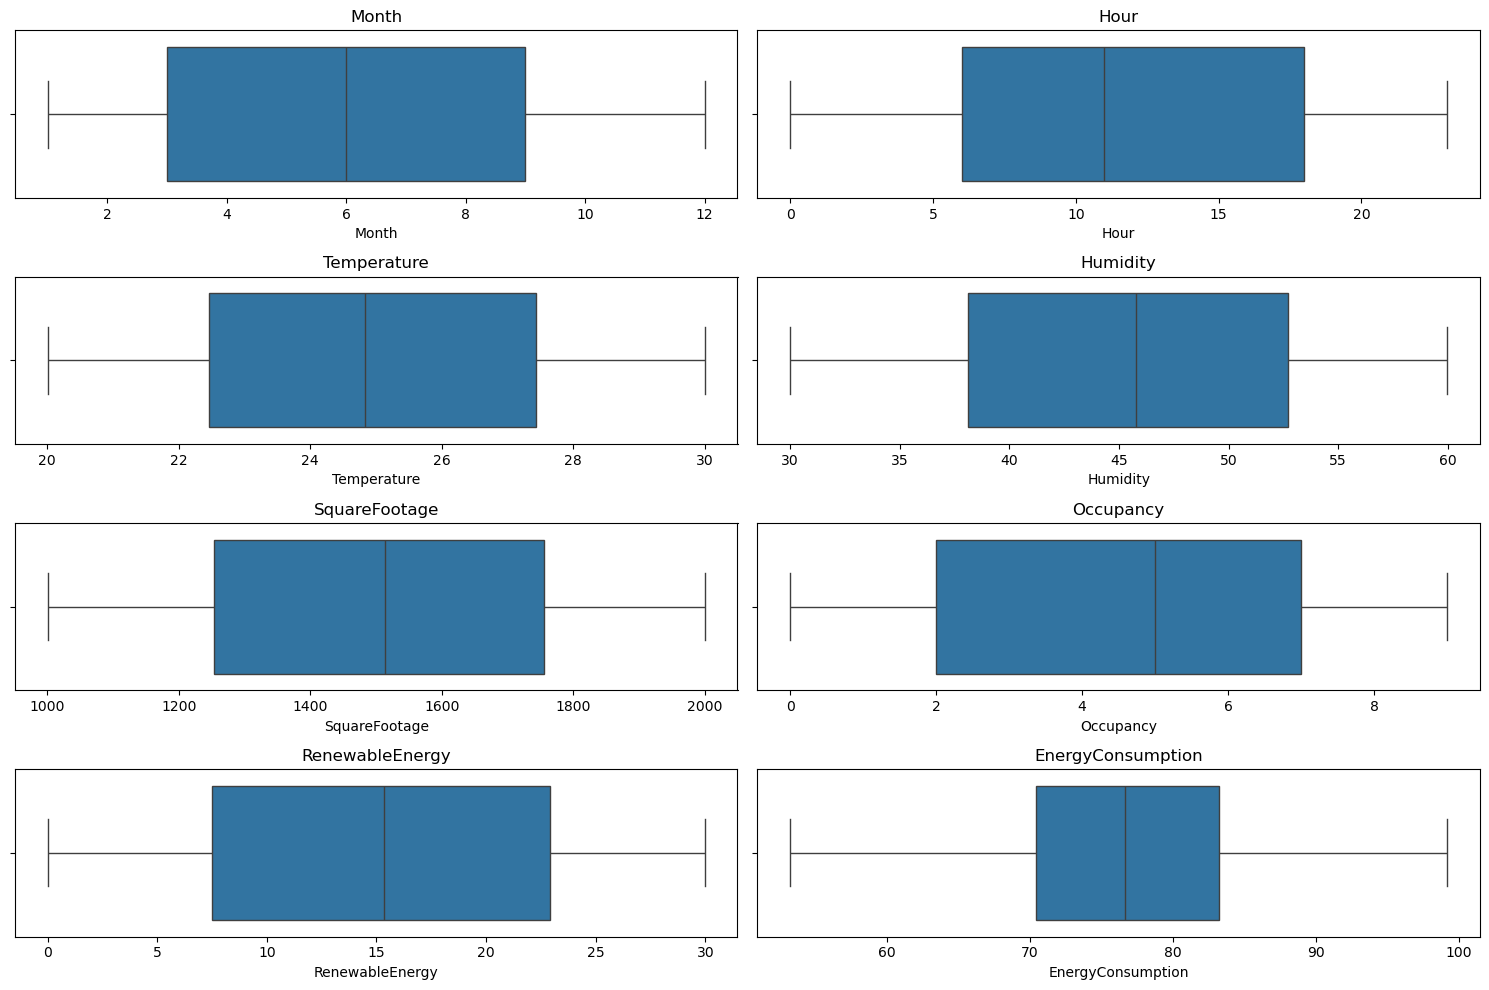

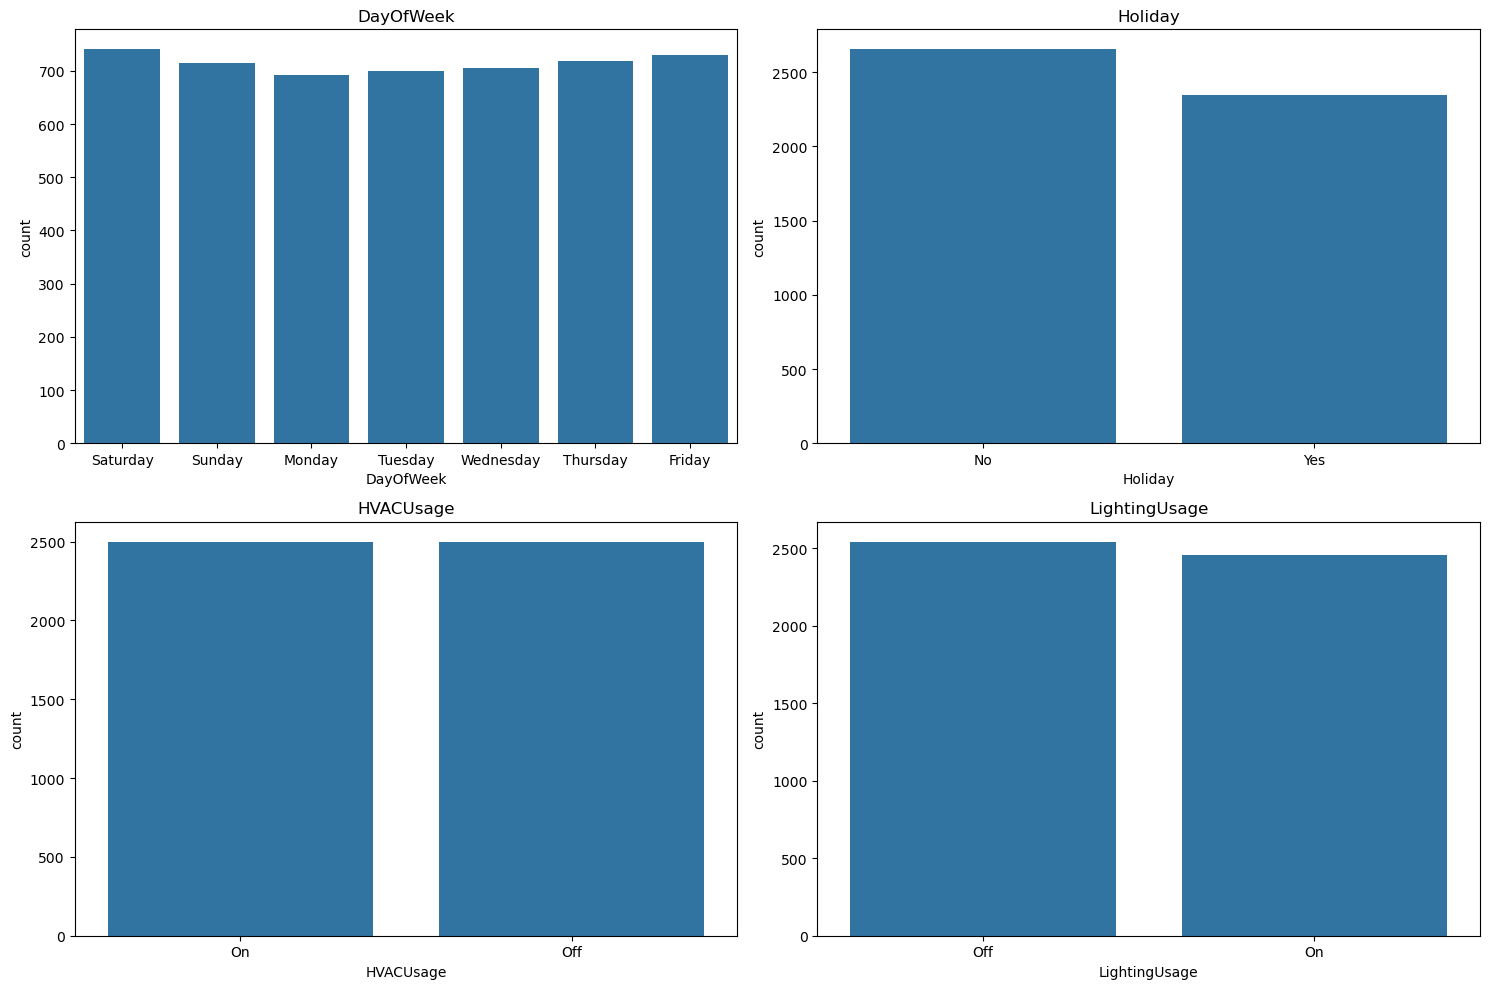

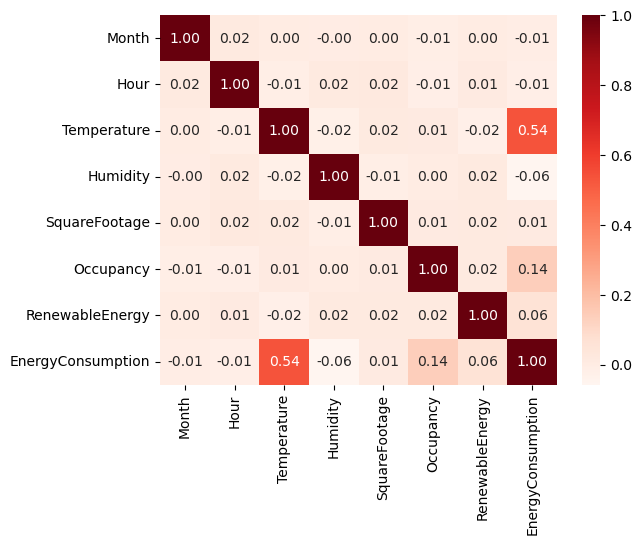

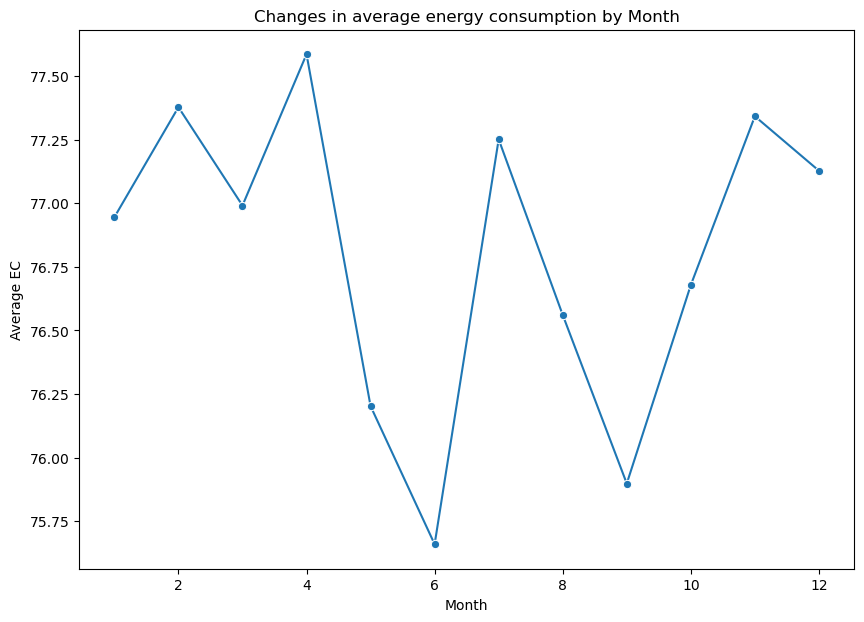

R2 Score: 0.26936592356273825
RMSE: 7.8091126466711716


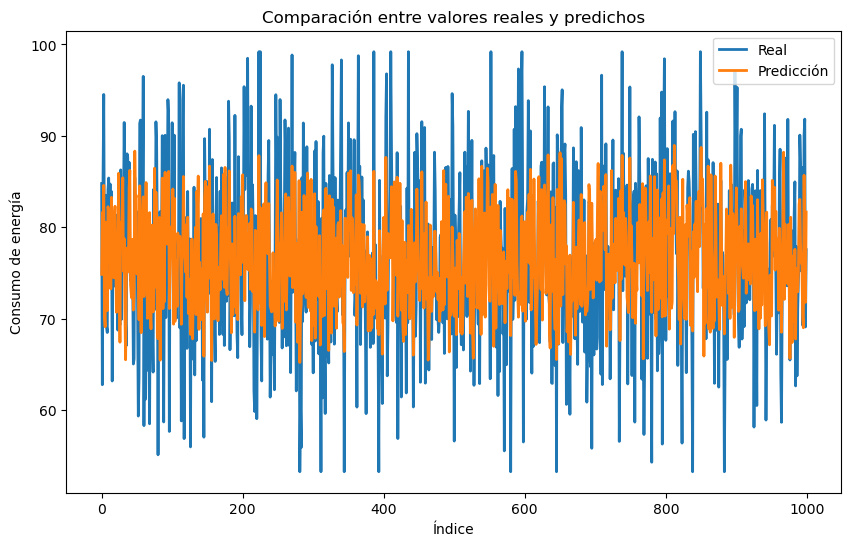

In [78]:

# ====================================
# IMPORTACIONES
# ====================================
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")


In [79]:

# ====================================
# CARGA DE DATOS
# ====================================
base_hs = pd.read_csv('C:/Users/MyDELL/Desktop/msds/repositorio/household_energy/datasets/Energy_consumption_dataset.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB
None
                index  Na
0               Month   0
1                Hour   0
2           DayOfWeek   0
3             Holiday   0
4         Temperature 

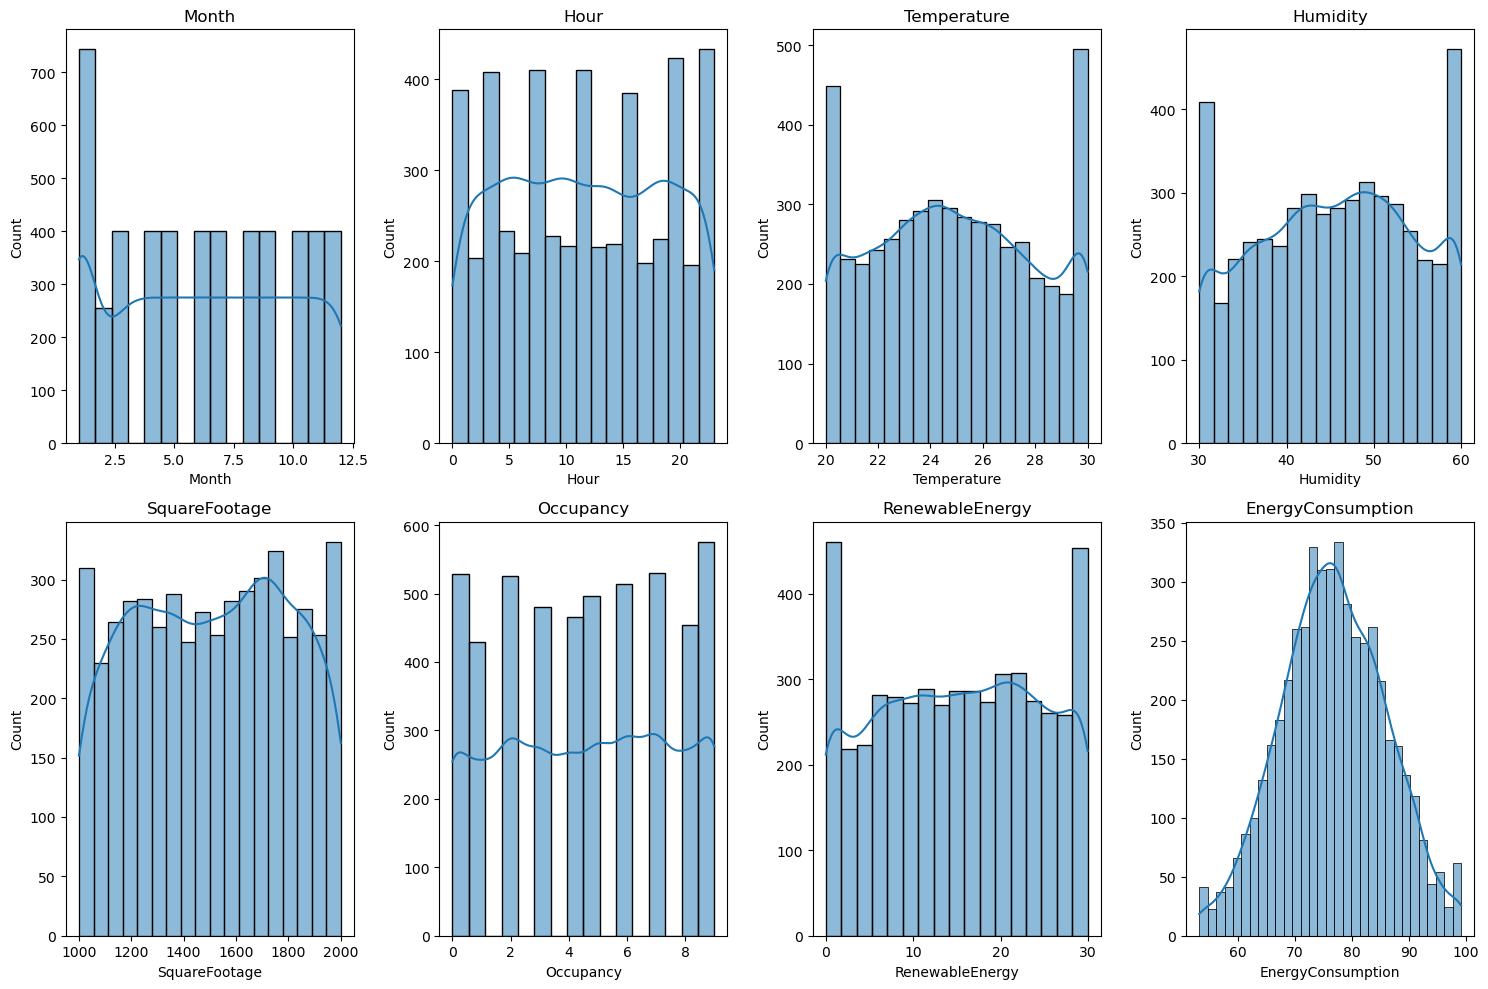

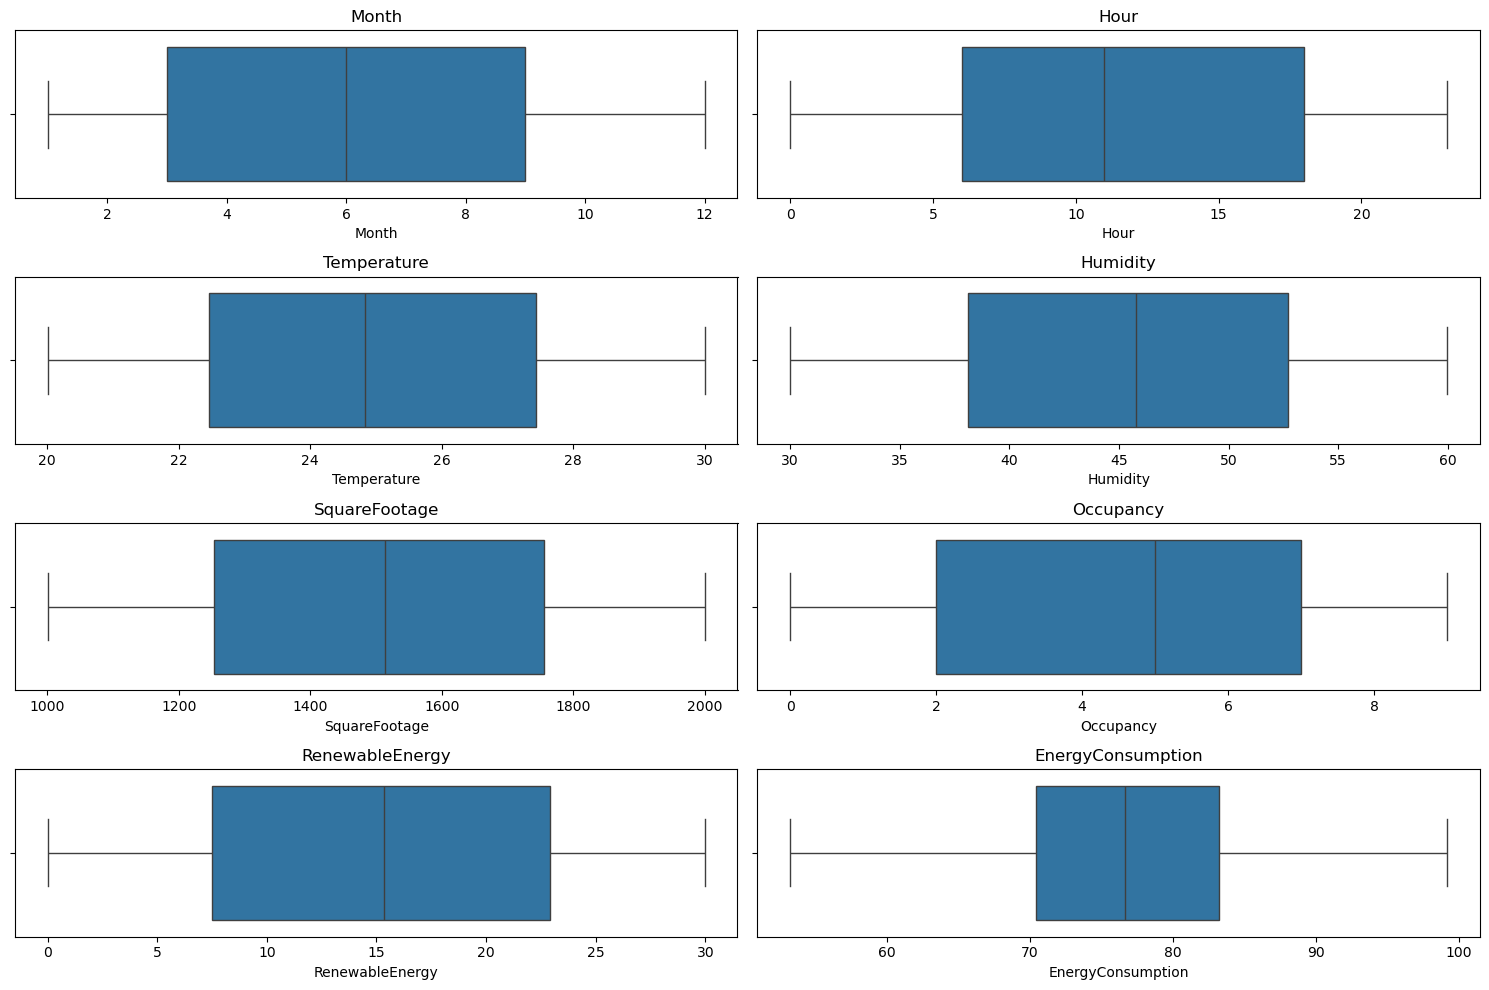

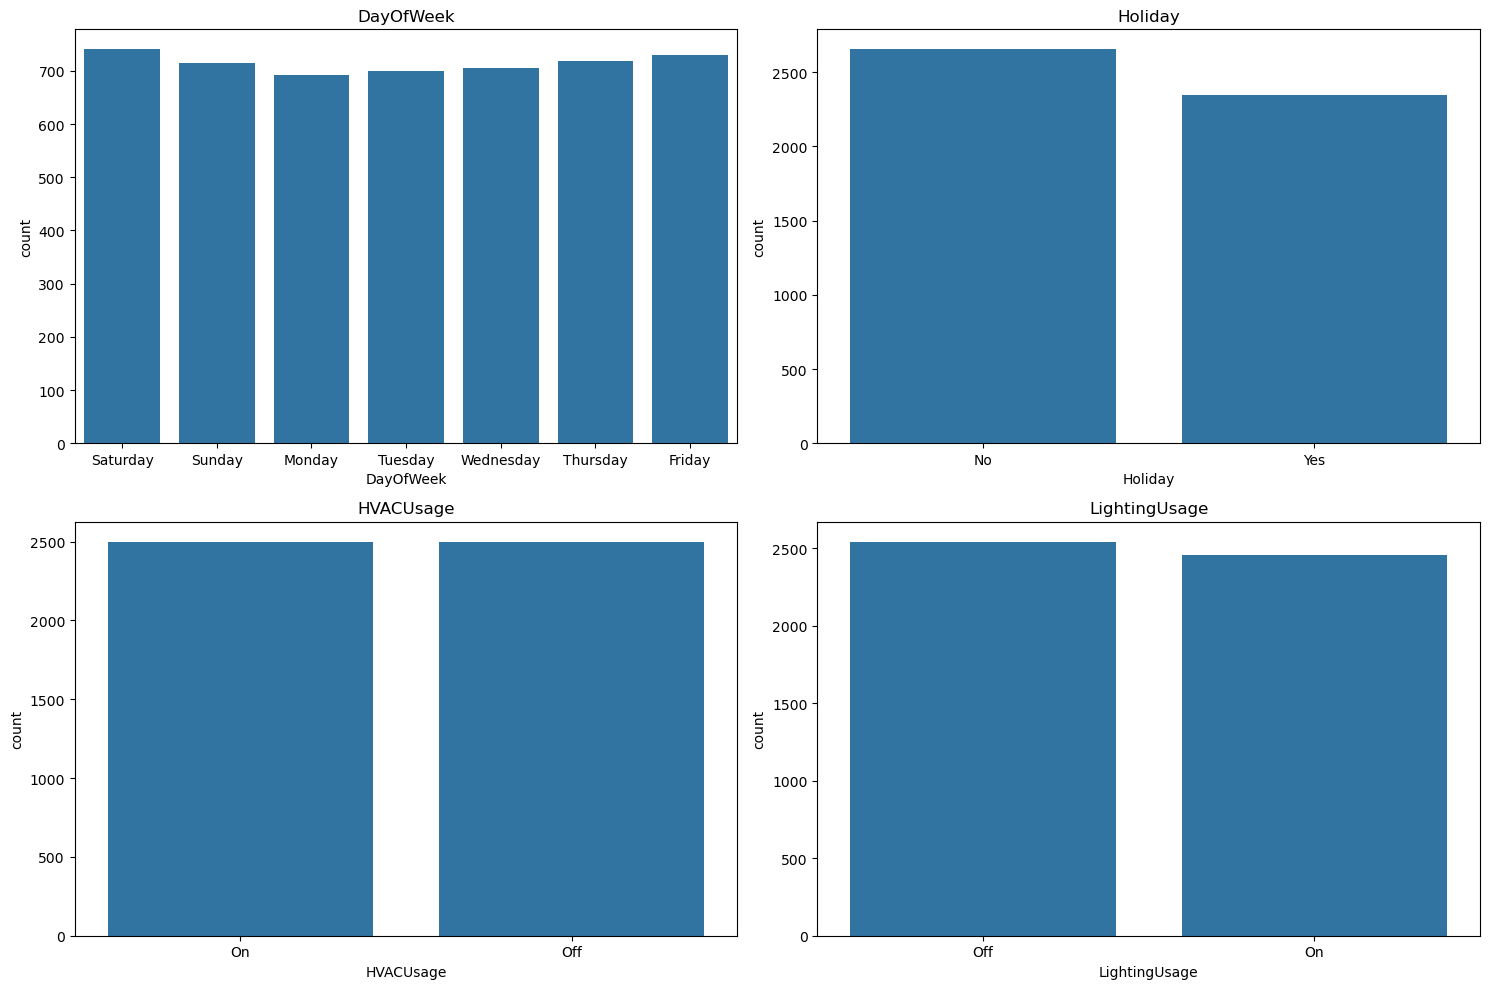

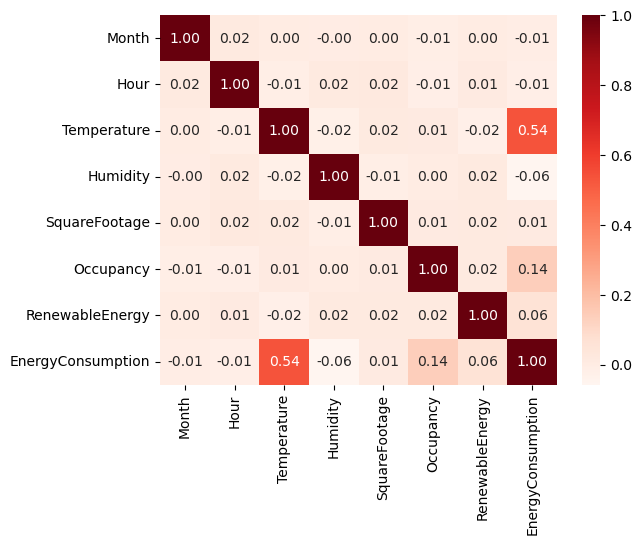

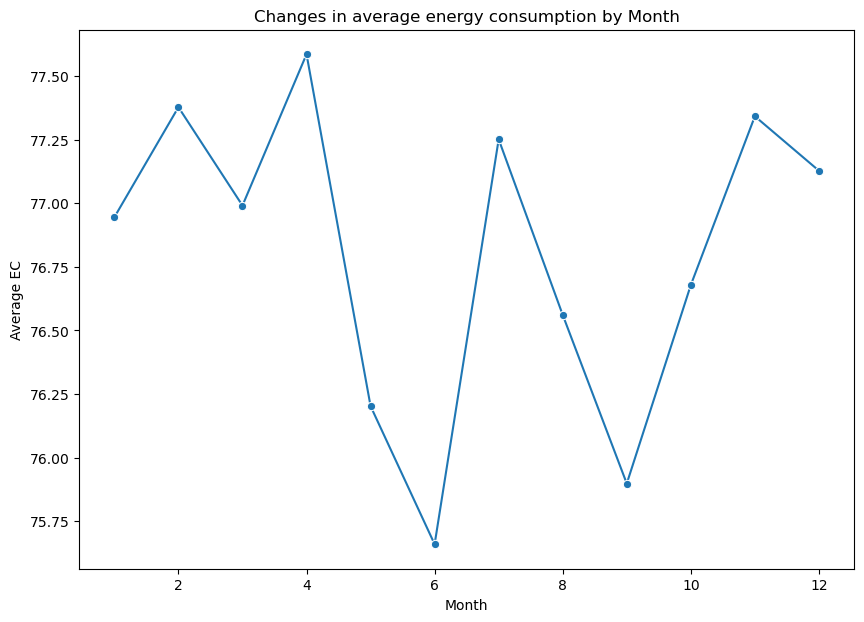

In [80]:

# ====================================
# EDA - ANÁLISIS EXPLORATORIO
# ====================================
print(base_hs.info())
print(pd.DataFrame(base_hs.isna().sum().reset_index(name='Na')))
print("Duplicados:", base_hs.duplicated().sum())
print(base_hs.head())

num_cols = base_hs.select_dtypes(include=['int64', 'float64']).columns
cat_cols = base_hs.select_dtypes(exclude=['int64', 'float64']).columns

# Histogramas
f, ax = plt.subplots(2, 4, figsize=(15, 10))
ax = ax.flatten()
for index, cols in enumerate(num_cols):
    sns.histplot(data=base_hs, x=cols, ax=ax[index], kde=True)
    ax[index].set_title(cols)
plt.tight_layout()
plt.show()

# Boxplots
f, ax = plt.subplots(4, 2, figsize=(15, 10))
ax = ax.flatten()
for index, cols in enumerate(num_cols):
    sns.boxplot(base_hs, x=cols, ax=ax[index])
    ax[index].set_title(cols)
plt.tight_layout()
plt.show()

# Conteo de categorías
f, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()
for index, cols in enumerate(cat_cols):
    sns.countplot(base_hs, x=cols, ax=ax[index])
    ax[index].set_title(cols)
plt.tight_layout()
plt.show()

# Correlación
sns.heatmap(base_hs[num_cols].corr(), annot=True, cmap='Reds', fmt='.2f')
plt.show()

# Promedio mensual
mas = base_hs.groupby(['Month'])['EnergyConsumption'].mean().reset_index(name='Average EC')
plt.figure(figsize=(10, 7))
sns.lineplot(mas, x='Month', y='Average EC', marker='o')
plt.title('Changes in average energy consumption by Month')
plt.show()

In [81]:


# ====================================
# DATA WRANGLING
# ====================================
# Ejemplo: rellenar NaNs
base_hs.fillna(method='ffill', inplace=True)


In [82]:
base_hs.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


In [83]:

# ====================================
# FEATURE ENGINEERING
# ====================================
# Convertir columnas categóricas en variables dummy
base_hs = pd.get_dummies(base_hs, columns=cat_cols, drop_first=True)

In [84]:
base_hs

,Month,Hour,Temperature,Humidity,SquareFootage,Occupancy,RenewableEnergy,EnergyConsumption,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Holiday_Yes,HVACUsage_On,LightingUsage_On
0,1,0,25.139433,43.431581,1565.693999,5,2.774699,75.364373,False,True,False,False,False,False,False,True,False
1,1,1,27.731651,54.225919,1411.064918,1,21.831384,83.401855,False,True,False,False,False,False,False,True,True
2,1,2,28.704277,58.907658,1755.715009,2,6.764672,78.270888,False,True,False,False,False,False,False,False,False
3,1,3,20.080469,50.371637,1452.316318,1,8.623447,56.519850,False,True,False,False,False,False,False,False,True
4,1,4,23.097359,51.401421,1094.130359,9,3.071969,70.811732,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,12,6,26.338718,52.580000,1563.567259,7,20.591717,70.270344,False,False,True,False,False,False,True,True,True
4996,12,17,20.007565,42.765607,1999.982252,5,7.536319,73.943071,True,False,False,False,False,False,False,False,True
4997,12,13,26.226253,30.015975,1999.982252,5,28.162193,85.784613,False,False,False,True,False,False,True,False,True
4998,12,8,24.673206,50.223939,1240.811298,2,20.918483,63.784001,False,True,False,False,False,False,True,True,True


In [85]:

# ====================================
# MACHINE LEARNING
# ====================================
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = base_hs.drop(columns=['EnergyConsumption'])
y = base_hs['EnergyConsumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.26936592356273825
RMSE: 7.8091126466711716


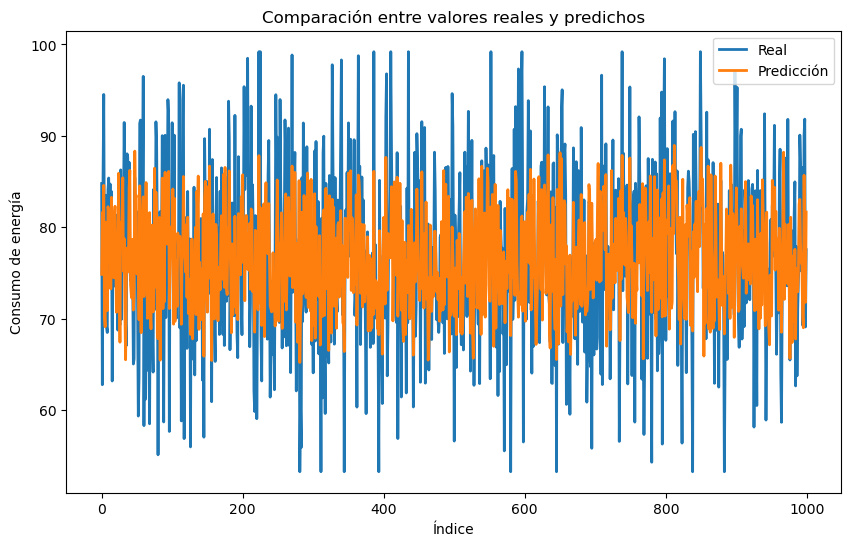

In [86]:


# ====================================
# VISUALIZACIÓN DE PREDICCIONES
# ====================================
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test.values, label='Real', linewidth=2)
plt.plot(range(len(y_pred)), y_pred, label='Predicción', linewidth=2)
plt.legend()
plt.title('Comparación entre valores reales y predichos')
plt.xlabel('Índice')
plt.ylabel('Consumo de energía')
plt.show()


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# Cargar dataset
base_hs = pd.read_csv("C:/Users/MyDELL/Desktop/msds/repositorio/household_energy/datasets/Energy_consumption_dataset.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB
None
             Month         Hour  Temperature     Humidity  SquareFootage  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   


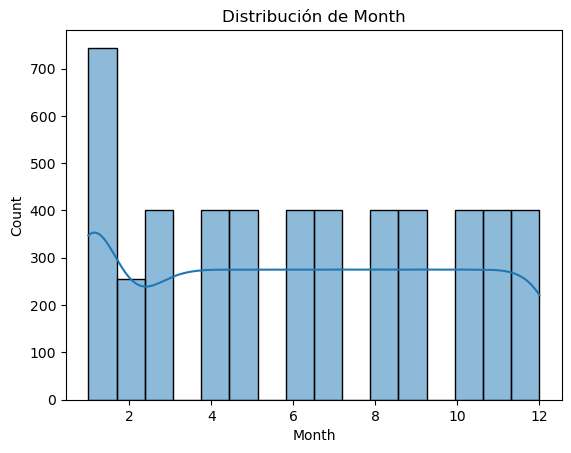

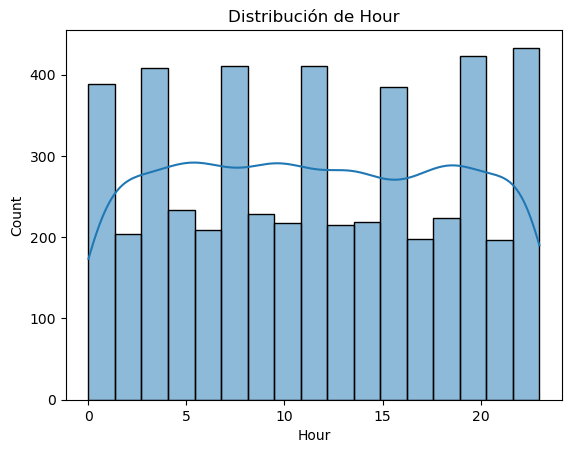

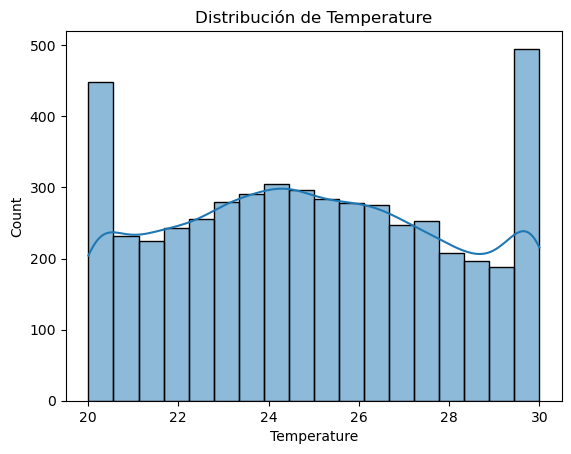

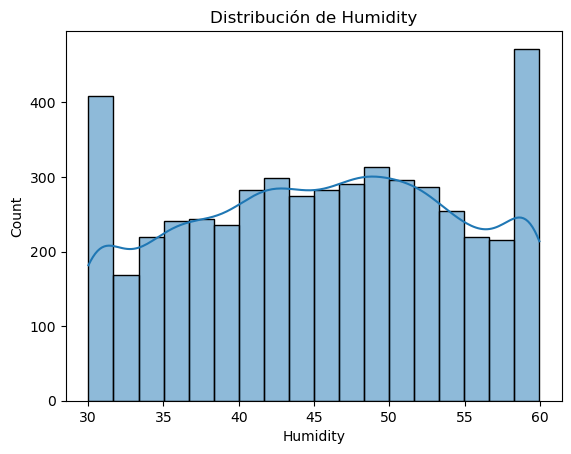

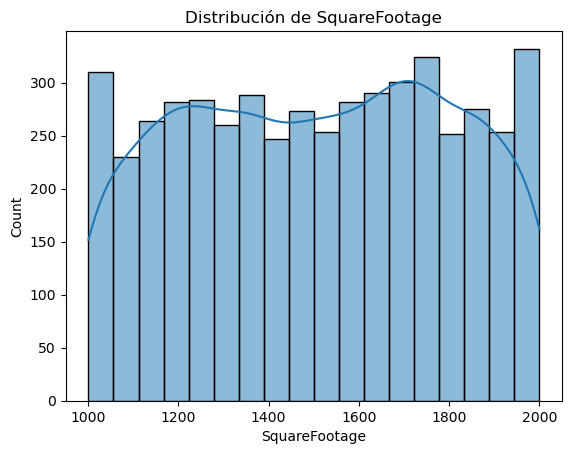

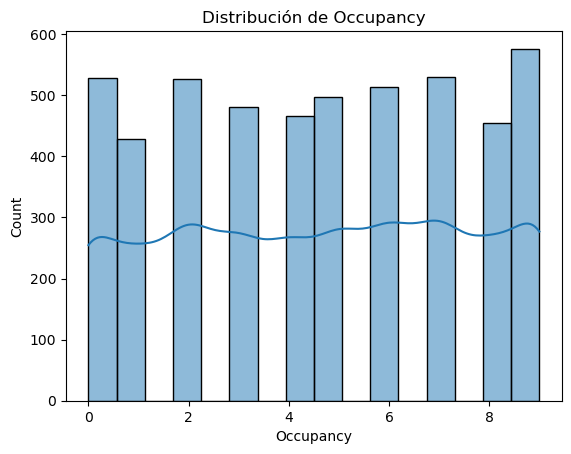

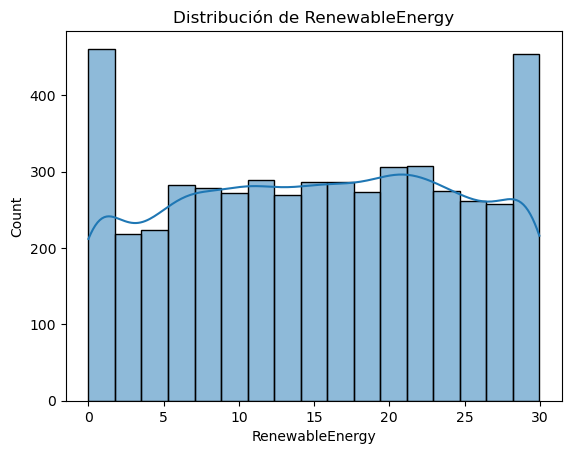

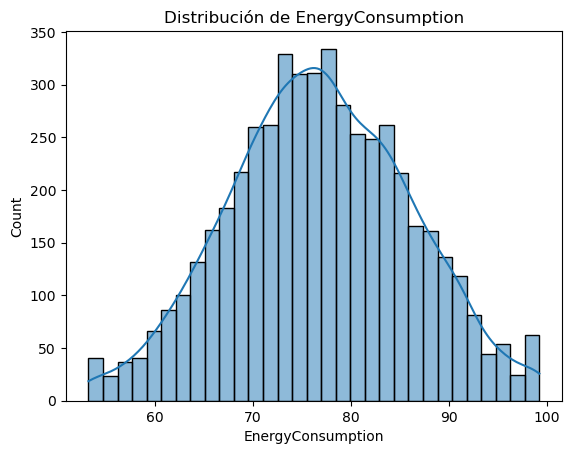

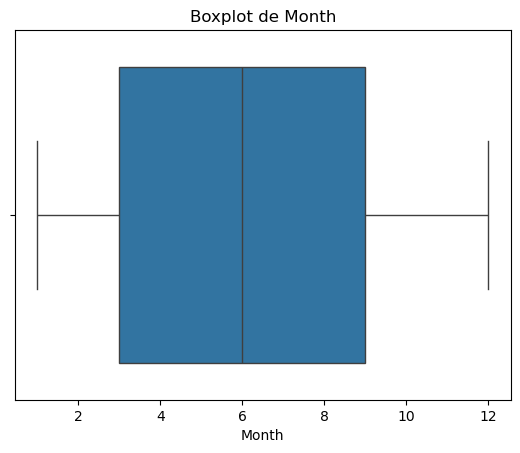

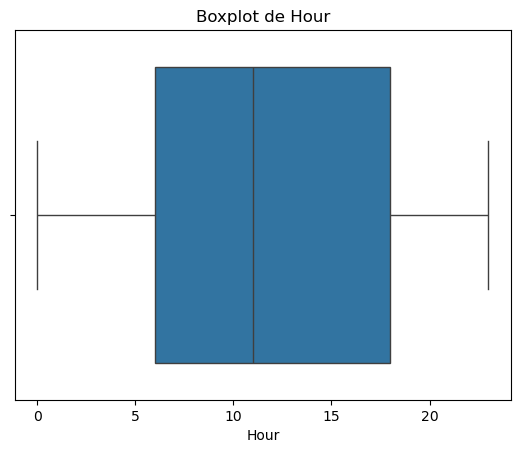

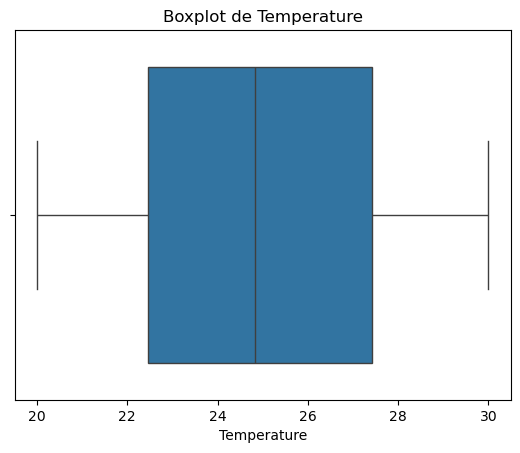

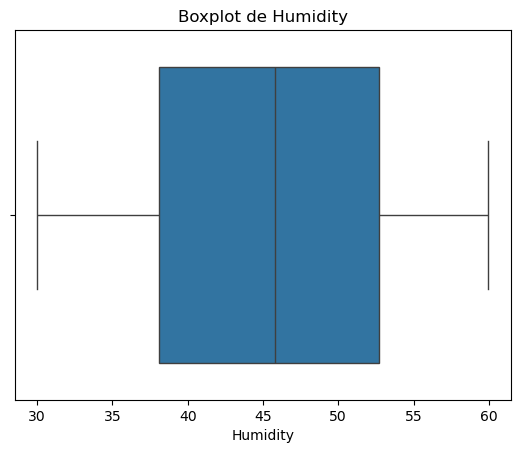

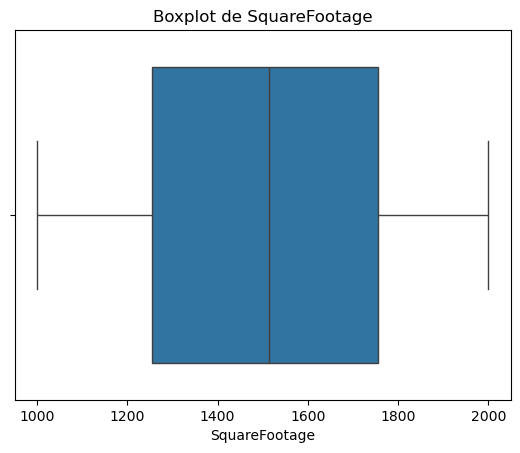

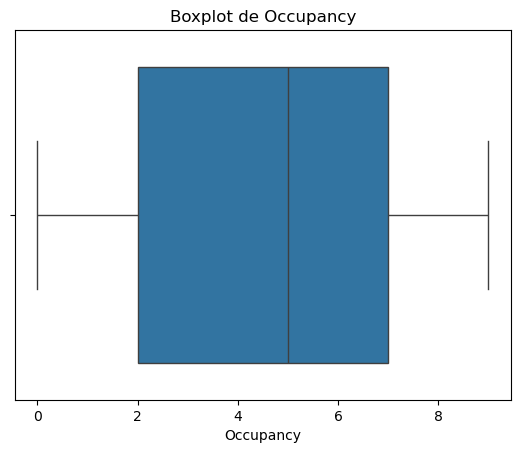

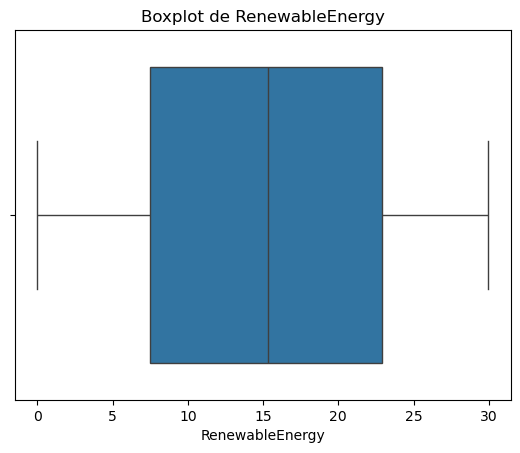

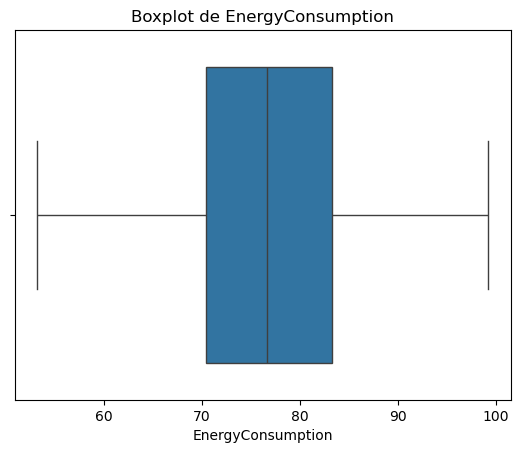

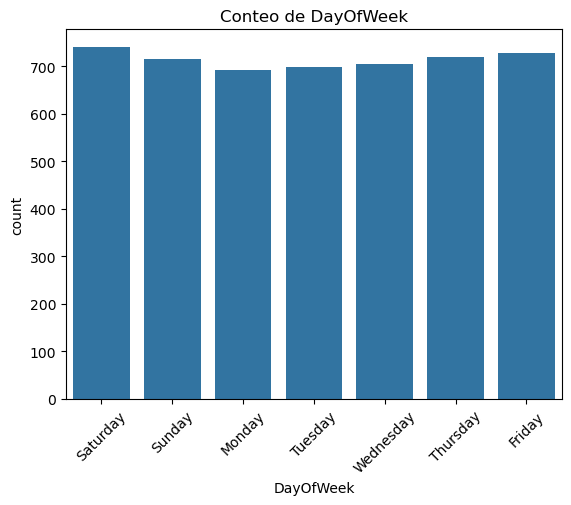

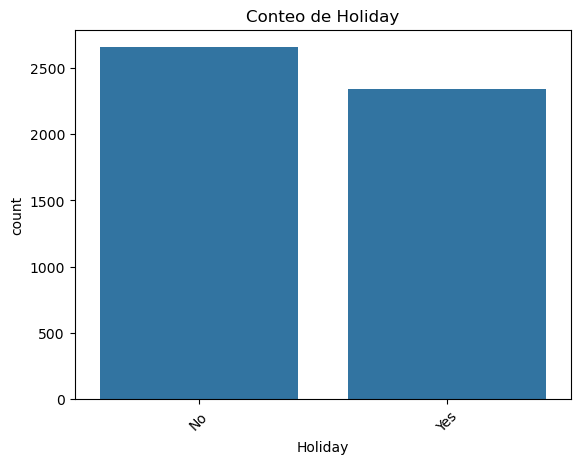

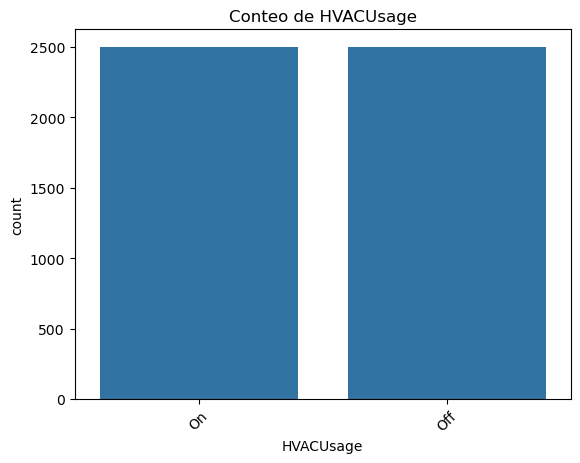

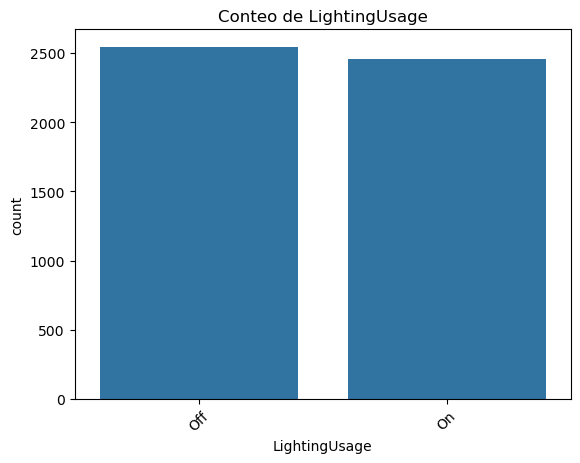

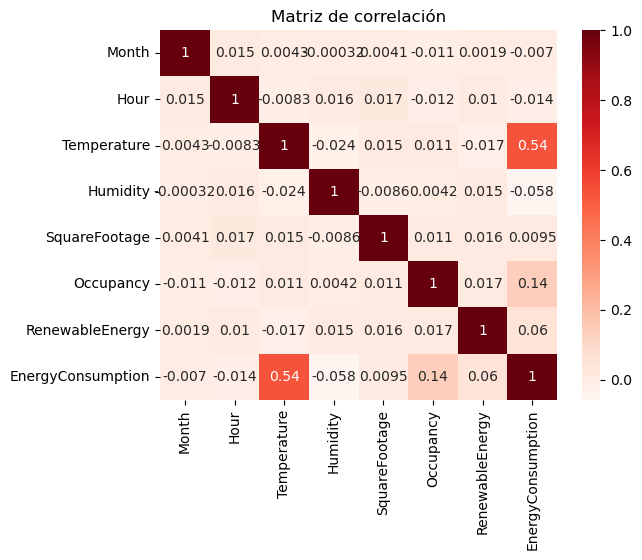

In [88]:
# Información general
print(base_hs.info())
print(base_hs.describe())
print("Duplicados:", base_hs.duplicated().sum())
print(base_hs.isna().sum())

# Columnas numéricas y categóricas
num_cols = base_hs.select_dtypes(include=['int64', 'float64']).columns
cat_cols = base_hs.select_dtypes(exclude=['int64', 'float64']).columns

# Histograma
for col in num_cols:
    sns.histplot(base_hs[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

# Boxplot
for col in num_cols:
    sns.boxplot(x=base_hs[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

# Conteo de categorías
for col in cat_cols:
    sns.countplot(x=base_hs[col])
    plt.title(f'Conteo de {col}')
    plt.xticks(rotation=45)
    plt.show()

# Correlación
sns.heatmap(base_hs[num_cols].corr(), annot=True, cmap="Reds")
plt.title("Matriz de correlación")
plt.show()

In [89]:
# Rellenar NaNs si los hubiera
base_hs.fillna(method='ffill', inplace=True)

In [ ]:
#feature enginering

In [90]:
# One-hot encoding para variables categóricas
base_hs = pd.get_dummies(base_hs, columns=cat_cols, drop_first=True)

# Separar variables
X = base_hs.drop(columns=['EnergyConsumption'])
y = base_hs['EnergyConsumption']

In [91]:
# machine learning

In [96]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Personalización de hiperparámetros
model_params = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge': {
        'model': Ridge(),
        'params': {'alpha': 0.10}
    },
    'Lasso': {
        'model': Lasso(),
        'params': {'alpha': 0.10}
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': 300, 
                   'max_depth': 20, 
                   'min_samples_split': 5,
                   'random_state': 1234}
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(),
        'params': {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 3, 'random_state': 42}
    },
    'XGBoost': {
        'model': XGBRegressor(),
        'params': {'n_estimators': 500, 
                   'learning_rate': 0.03, 
                   'max_depth': 3,
                   'subsample':0.08,
                   'colsample_bytree': 0.8,
                   'random_state': 1234}
    }
}

# Separar conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos a comparar
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Evaluar todos los modelos
results = {}

for name, mp in model_params.items():
    model = mp['model'].set_params(**mp['params'])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name} → RMSE: {rmse:.2f}, R2: {r2:.2f}")

Linear Regression → RMSE: 7.81, R2: 0.27
Ridge → RMSE: 7.81, R2: 0.27
Lasso → RMSE: 7.79, R2: 0.27
Random Forest → RMSE: 7.99, R2: 0.24
Gradient Boosting → RMSE: 7.79, R2: 0.27
XGBoost → RMSE: 7.93, R2: 0.25


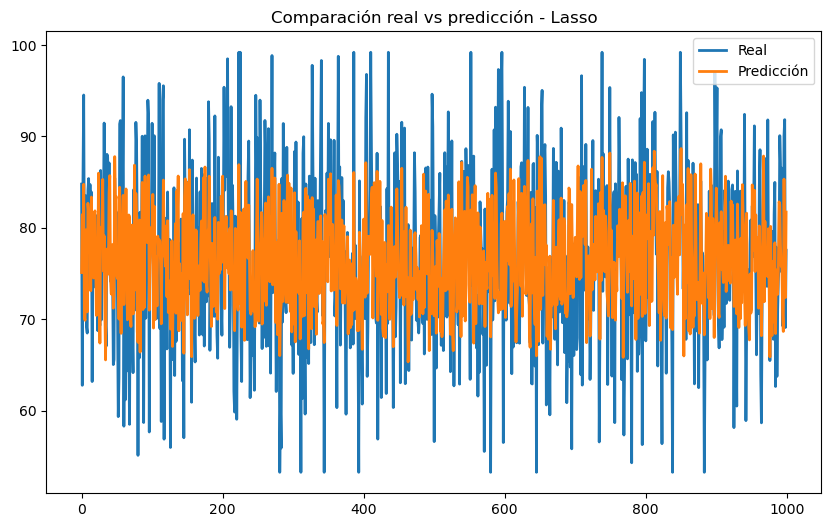

In [97]:
# Elegir mejor modelo
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = model_params[best_model_name]['model'].set_params(**model_params[best_model_name]['params'])
y_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Real', linewidth=2)
plt.plot(y_pred, label='Predicción', linewidth=2)
plt.title(f'Comparación real vs predicción - {best_model_name}')
plt.legend()
plt.show()